## Data Exploration & Preprocessing 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### loda data

In [13]:
train = pd.read_csv('./data/train.csv',header=0)
test = pd.read_csv('./data/test.csv',header=0)

/tmp/ipykernel_56298/1599941892.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./data/train.csv',header=0)


#### Display data train and test

In [36]:
train.head(10)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_min,sin_time,cos_time
0,p01_0,p01,1900-01-01 06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.4,370,0.999048,-0.043619
1,p01_1,p01,1900-01-01 06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.8,385,0.994056,-0.108867
2,p01_2,p01,1900-01-01 06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.5,400,0.984808,-0.173648
3,p01_3,p01,1900-01-01 06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.8,415,0.971342,-0.237686
4,p01_4,p01,1900-01-01 07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.7,430,0.953717,-0.300706
5,p01_5,p01,1900-01-01 07:25:00,NaN,NaN,8.1,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.4,445,0.932008,-0.362438
6,p01_6,p01,1900-01-01 07:40:00,NaN,NaN,8.3,NaN,NaN,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.9,460,0.906308,-0.422618
7,p01_7,p01,1900-01-01 07:55:00,NaN,NaN,9.6,NaN,NaN,11.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.1,475,0.876727,-0.480989
8,p01_8,p01,1900-01-01 08:10:00,NaN,NaN,11.1,NaN,NaN,11.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1,490,0.843391,-0.537300
9,p01_9,p01,1900-01-01 08:25:00,NaN,NaN,11.8,NaN,NaN,12.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.9,505,0.806445,-0.591310


In [26]:
test.head(10)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
2,p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,p01_8464,p01,00:20:00,NaN,NaN,9.6,NaN,NaN,10.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,p01_8465,p01,11:15:00,NaN,NaN,10.0,NaN,NaN,9.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,p01_8466,p01,04:15:00,NaN,NaN,7.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,p01_8467,p01,05:50:00,NaN,NaN,4.4,NaN,NaN,5.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,p01_8468,p01,12:00:00,NaN,NaN,14.2,NaN,NaN,14.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print(f'Training data have {train.shape[0]} rows and {train.shape[1]} cols')
print(f'Training data have {test.shape[0]} rows and {test.shape[1]} cols')

Training data have 177024 rows and 508 cols
Training data have 3644 rows and 507 cols


In [28]:
train.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 508 columns):
 #    Column         Non-Null Count   Dtype  
---   ------         --------------   -----  
 0    id             177024 non-null  object 
 1    p_num          177024 non-null  object 
 2    time           177024 non-null  object 
 3    bg-5:55        149770 non-null  float64
 4    bg-5:50        158533 non-null  float64
 5    bg-5:45        163364 non-null  float64
 6    bg-5:40        149766 non-null  float64
 7    bg-5:35        158254 non-null  float64
 8    bg-5:30        163770 non-null  float64
 9    bg-5:25        149763 non-null  float64
 10   bg-5:20        157973 non-null  float64
 11   bg-5:15        164174 non-null  float64
 12   bg-5:10        149771 non-null  float64
 13   bg-5:05        157677 non-null  float64
 14   bg-5:00        164585 non-null  float64
 15   bg-4:55        149780 non-null  float64
 16   bg-4:50        157381 non-null  float64
 17   bg-4:45 

In [29]:
test.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 507 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    id             3644 non-null   object 
 1    p_num          3644 non-null   object 
 2    time           3644 non-null   object 
 3    bg-5:55        2660 non-null   float64
 4    bg-5:50        3061 non-null   float64
 5    bg-5:45        3158 non-null   float64
 6    bg-5:40        2658 non-null   float64
 7    bg-5:35        3045 non-null   float64
 8    bg-5:30        3169 non-null   float64
 9    bg-5:25        2655 non-null   float64
 10   bg-5:20        3039 non-null   float64
 11   bg-5:15        3179 non-null   float64
 12   bg-5:10        2657 non-null   float64
 13   bg-5:05        3024 non-null   float64
 14   bg-5:00        3193 non-null   float64
 15   bg-4:55        2658 non-null   float64
 16   bg-4:50        3009 non-null   float64
 17   bg-4:45        3207 non-null   

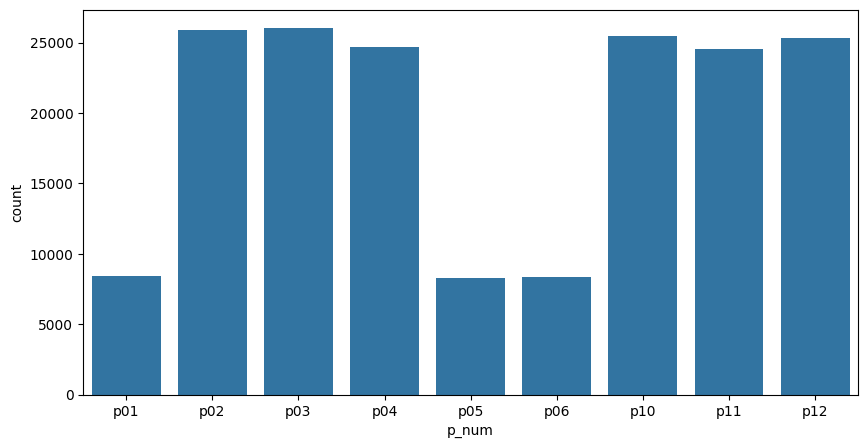

In [30]:
count_train = train.p_num.value_counts().sort_index()
count_train
plt.figure(figsize=(10,5))
sns.countplot(x='p_num', data=train)
plt.show()

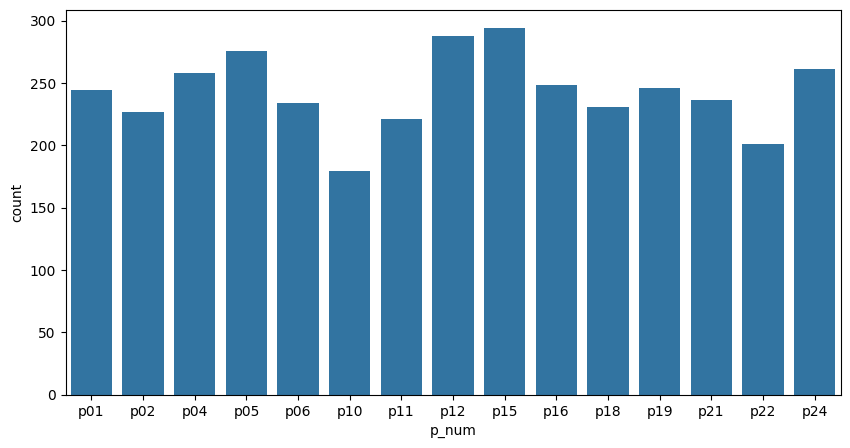

In [31]:
count_test = test.p_num.value_counts().sort_index()
count_test
plt.figure(figsize=(10,5))
sns.countplot(x='p_num', data=test)
plt.show()

### Data pre-preparation

#### In time series data, timestamp information is very important to capture features such as periodicity, trend, etc. of time. We transform the time column and extract ‘hour’ as a new feature to add to the data

In [14]:
# date conversion
train.time = pd.to_datetime(train.time, format='%H:%M:%S')
test.time = pd.to_datetime(test.time, format='%H:%M:%S')

train['hour'] = train.time.dt.hour
test['hour'] = test.time.dt.hour

train['time_min'] = train['time'].dt.hour * 60 + train['time'].dt.minute
test['time_min'] = test['time'].dt.hour * 60 + test['time'].dt.minute

train['sin_time'] = np.sin(2 * np.pi * train['time_min'] / 1440)
train['cos_time'] = np.cos(2 * np.pi * train['time_min'] / 1440)

test['sin_time'] = np.sin(2 * np.pi * test['time_min'] / 1440)
test['cos_time'] = np.cos(2 * np.pi * test['time_min'] / 1440)

#### Visualisation of target value 'bg+1:00'

In [15]:
target = 'bg+1:00'
#Stats of the target variable

train[target].describe()

count    177024.000000
mean          8.277045
std           2.996398
min           2.200000
25%           6.100000
50%           7.700000
75%           9.900000
max          27.800000
Name: bg+1:00, dtype: float64

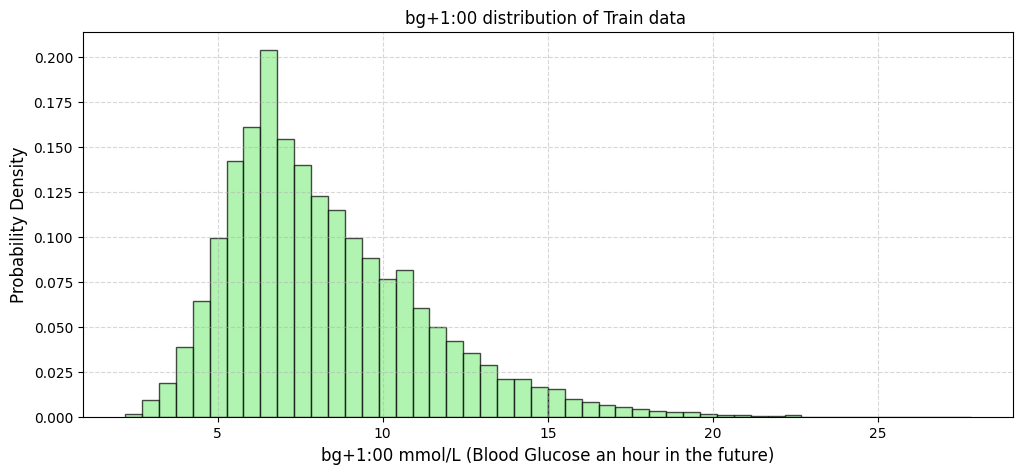

In [34]:
plt.figure(figsize=(12, 5))
train['bg+1:00'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', density=True, alpha=0.7)
plt.title('bg+1:00 distribution of Train data ')
plt.xlabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipykernel_5889/3616641417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hour', y=target, data=train, palette='viridis')


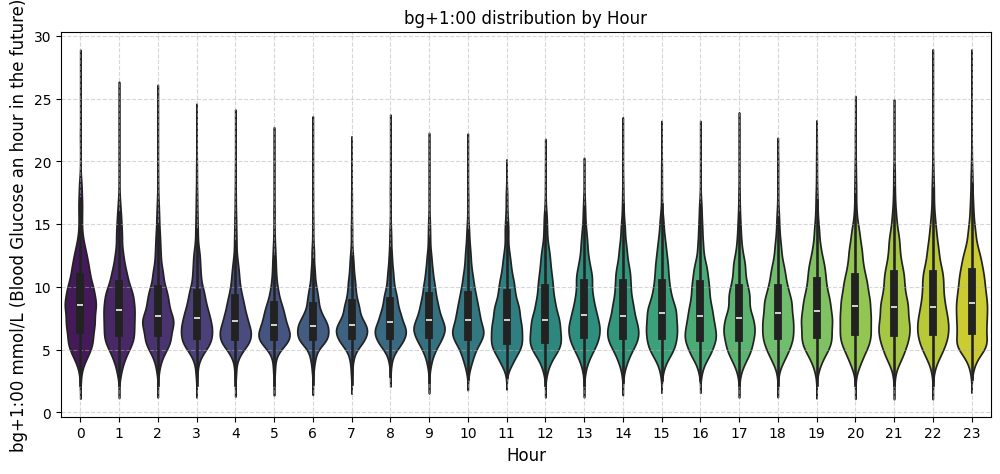

In [40]:
# Violin plot of target distribution by hour
plt.figure(figsize=(12, 5))
sns.violinplot(x='hour', y=target, data=train, palette='viridis')
plt.title('bg+1:00 distribution by Hour')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipykernel_5889/1199699378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='p_num', y=target, data=train, palette='muted')


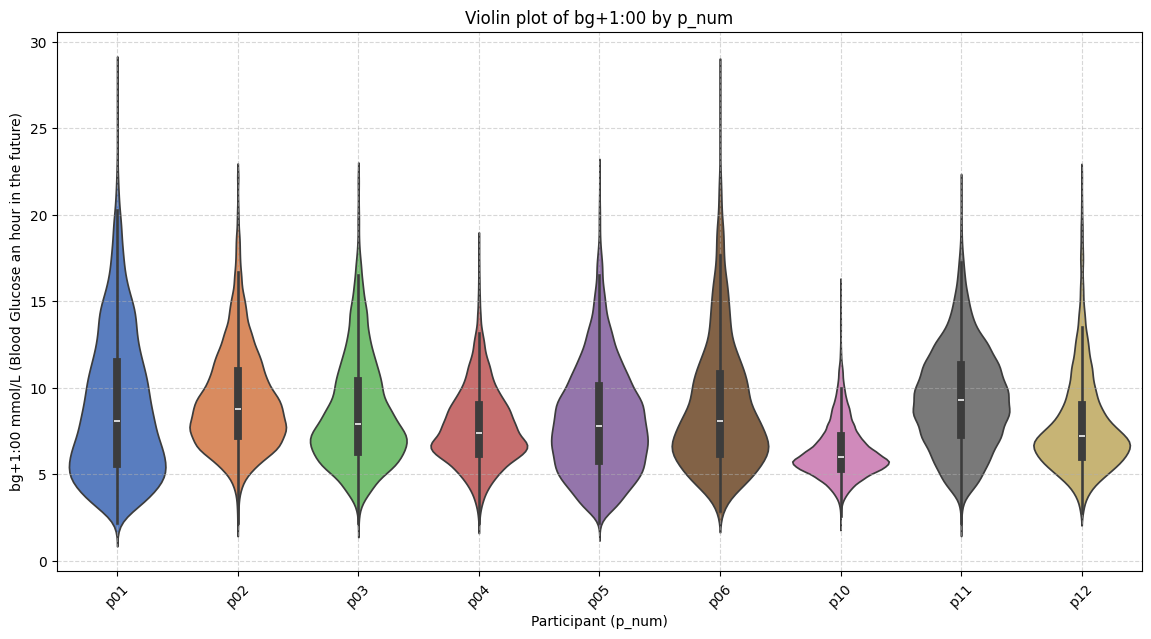

In [41]:
# Distribution of the target variable by Participant    
plt.figure(figsize=(14, 7))
sns.violinplot(x='p_num', y=target, data=train, palette='muted')
plt.title('Violin plot of bg+1:00 by p_num')
plt.xlabel('Participant (p_num)')
plt.ylabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### Visualisation of bg

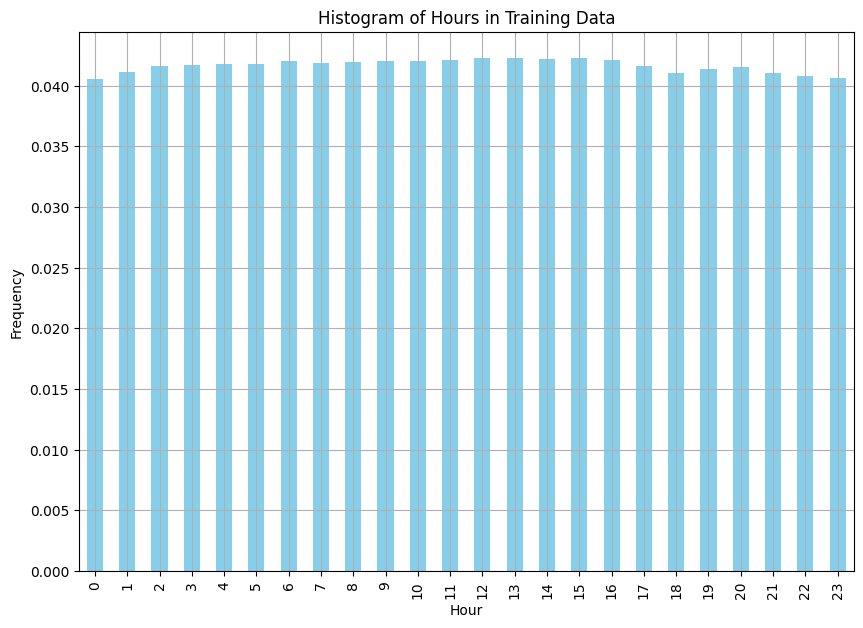

In [16]:
plt.figure(figsize=(10, 7))
train['hour'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Hours in Training Data')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

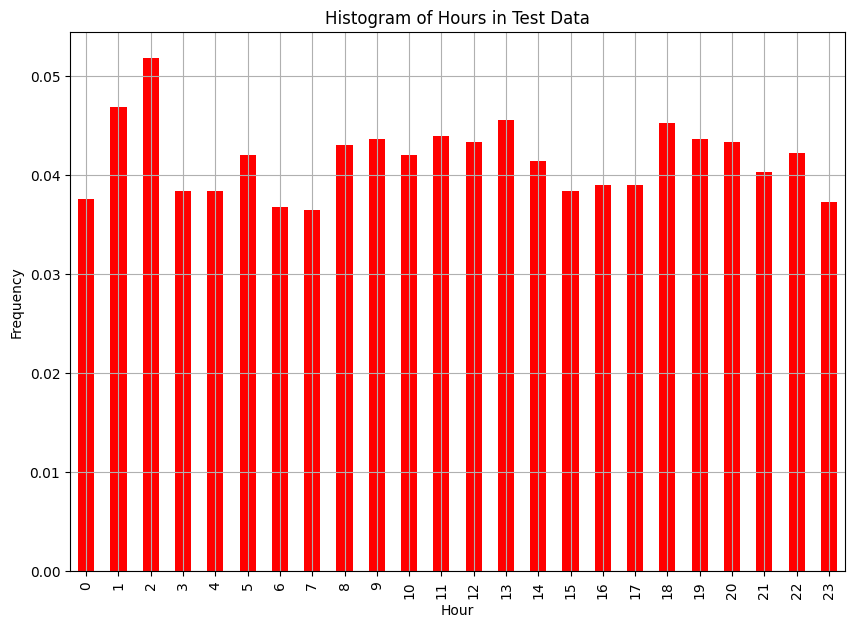

In [17]:
plt.figure(figsize=(10, 7))
test['hour'].value_counts(normalize=True).sort_index().plot(kind='bar', color='red')
plt.title('Histogram of Hours in Test Data')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

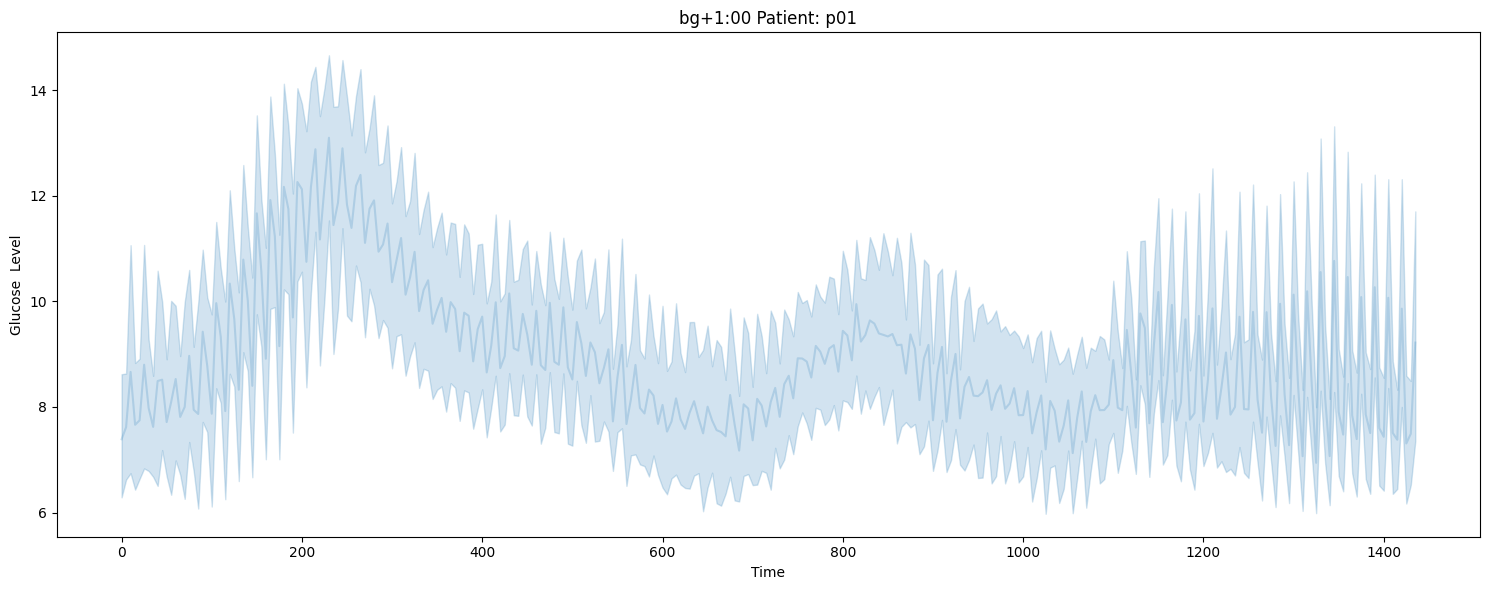

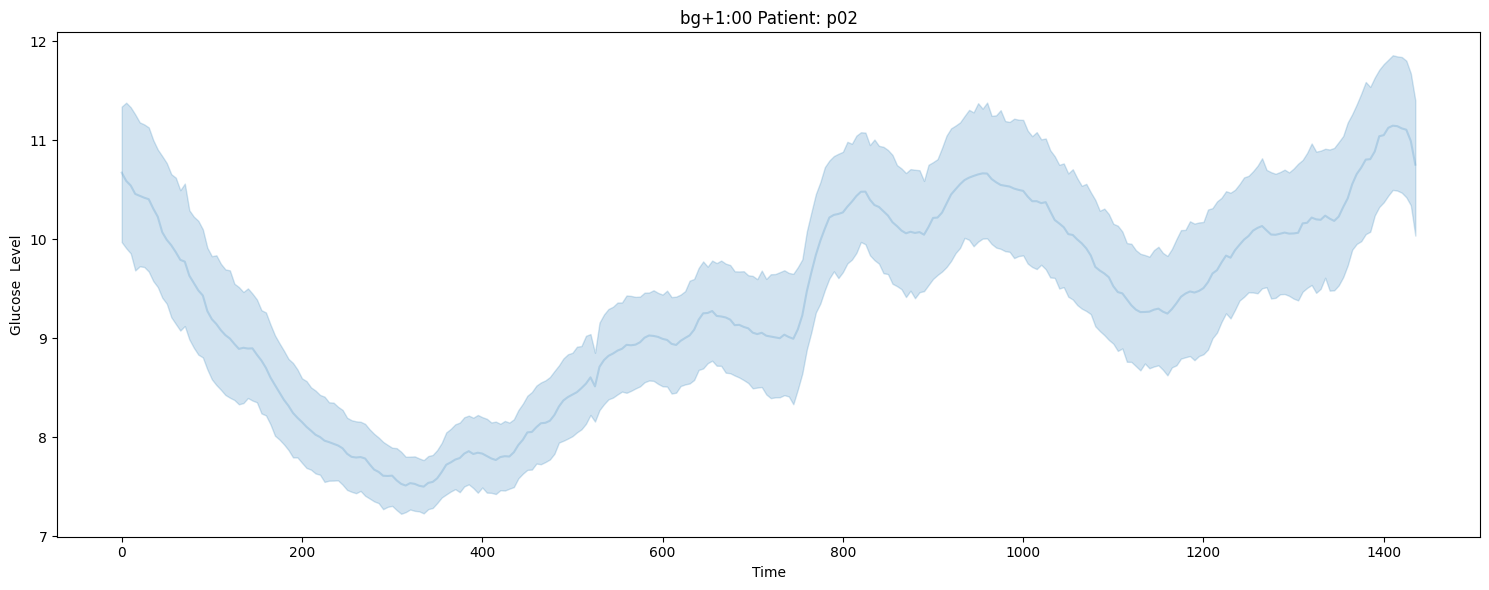

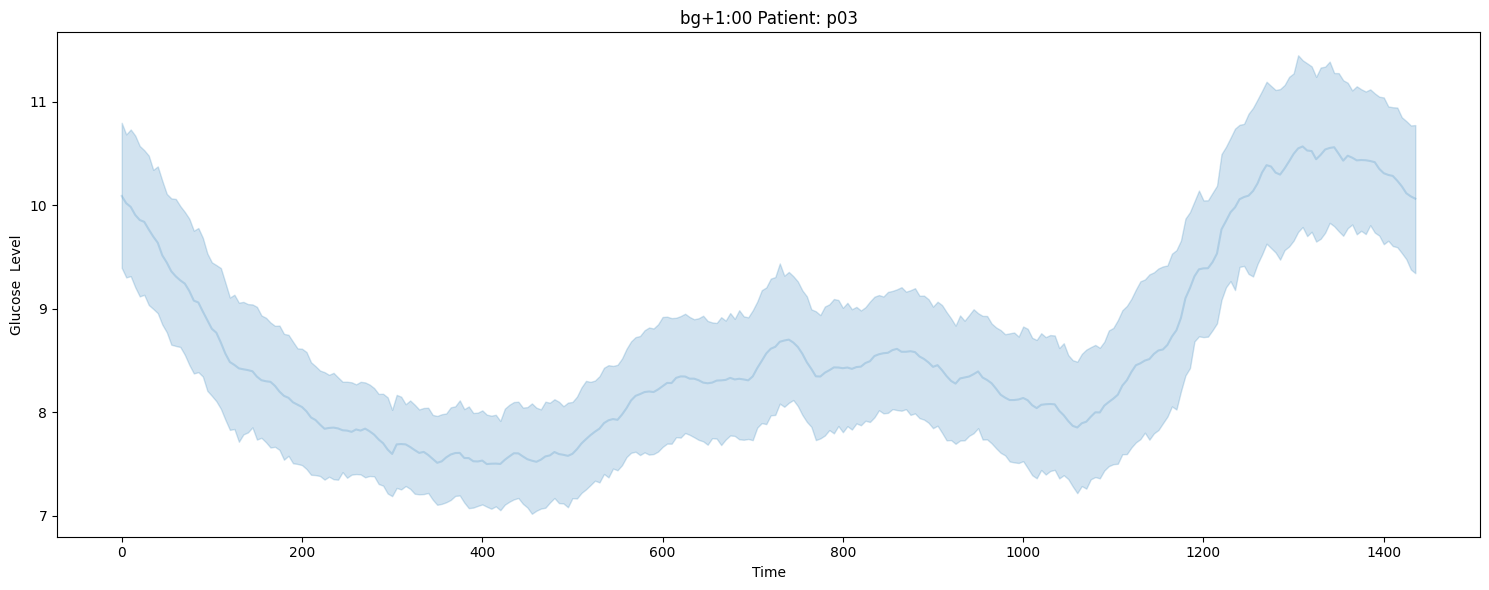

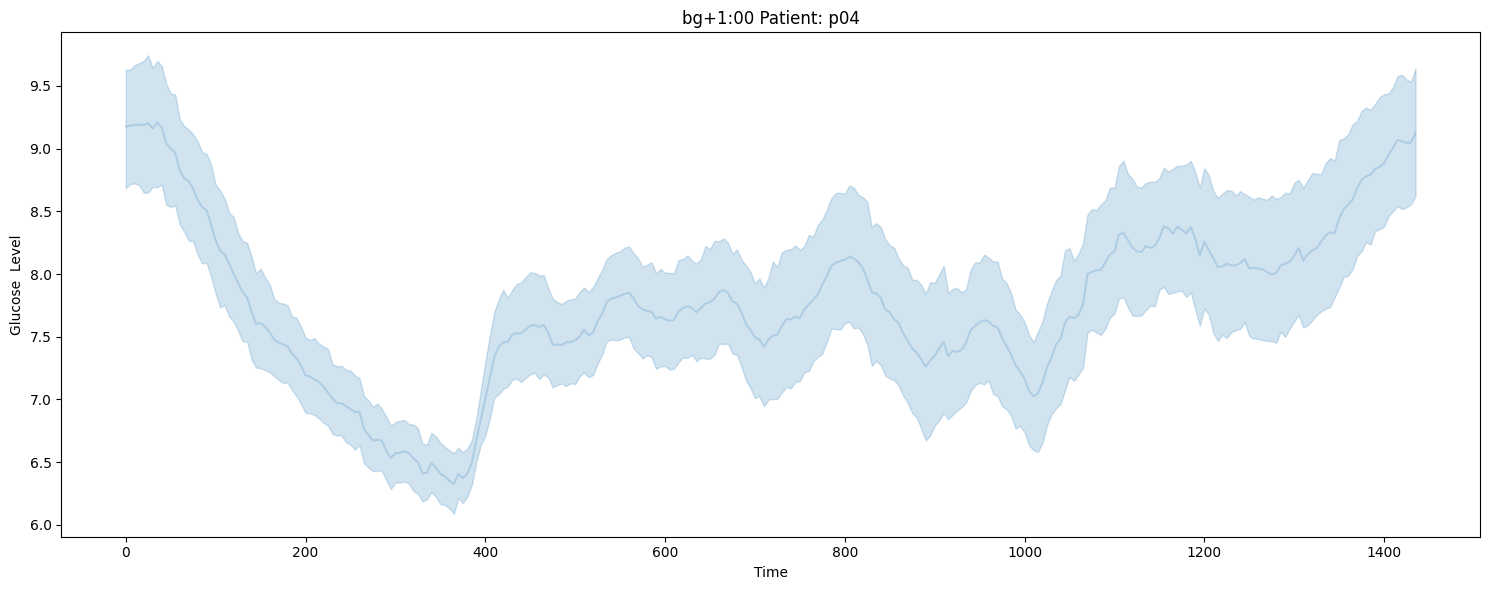

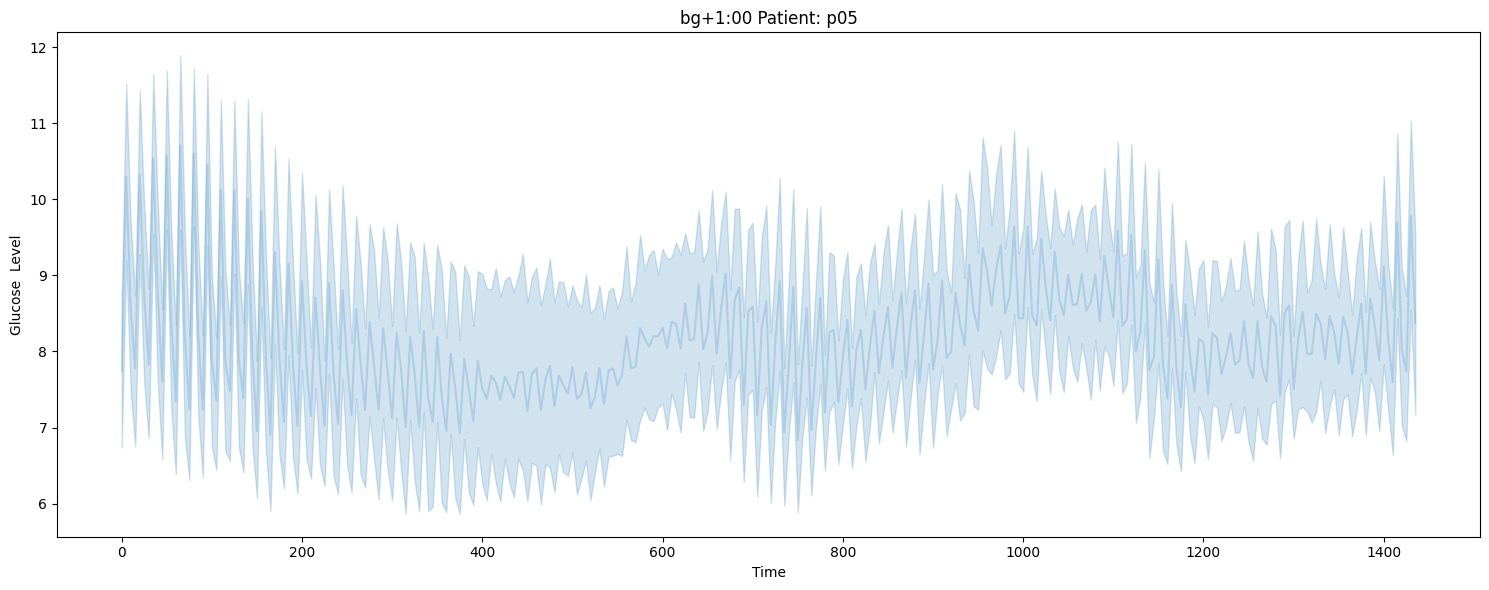

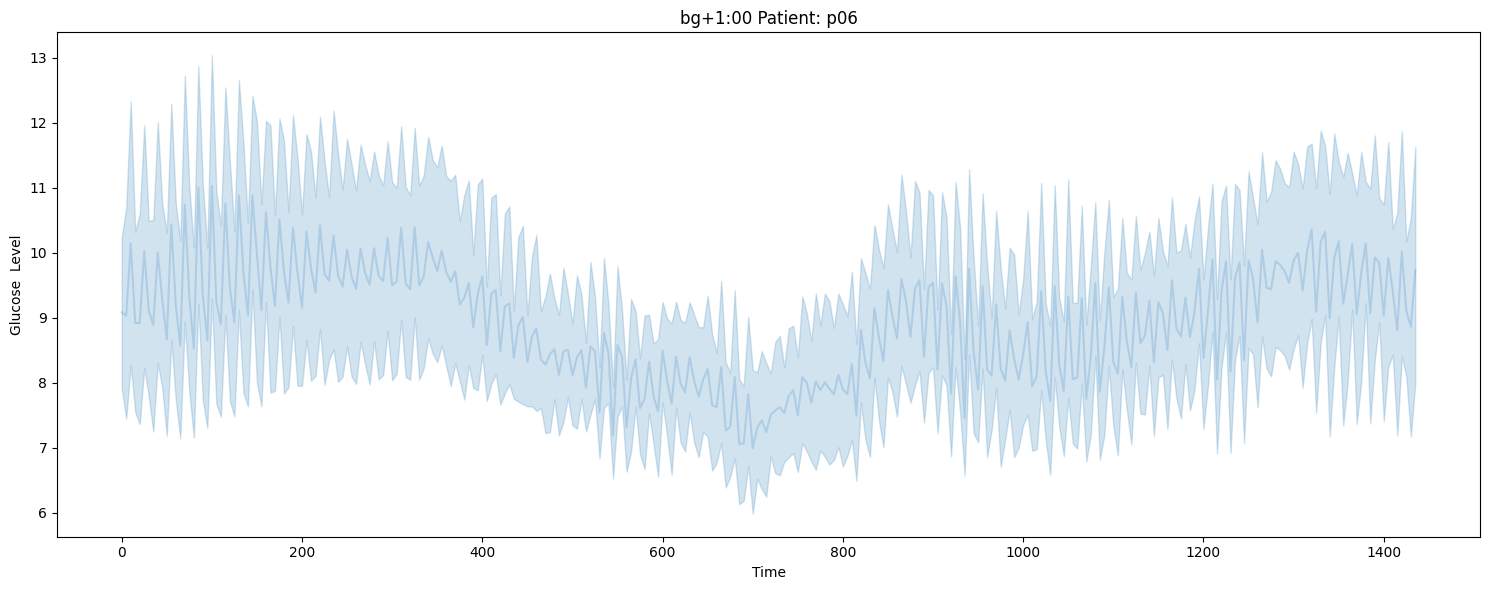

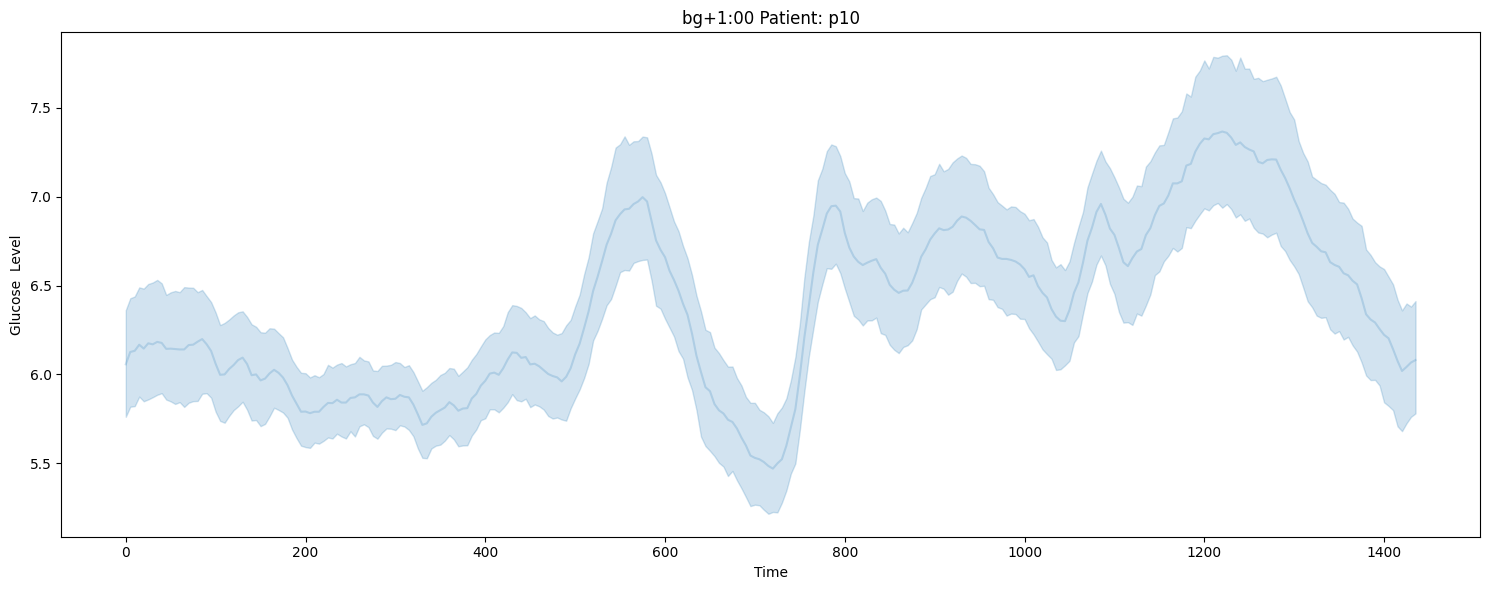

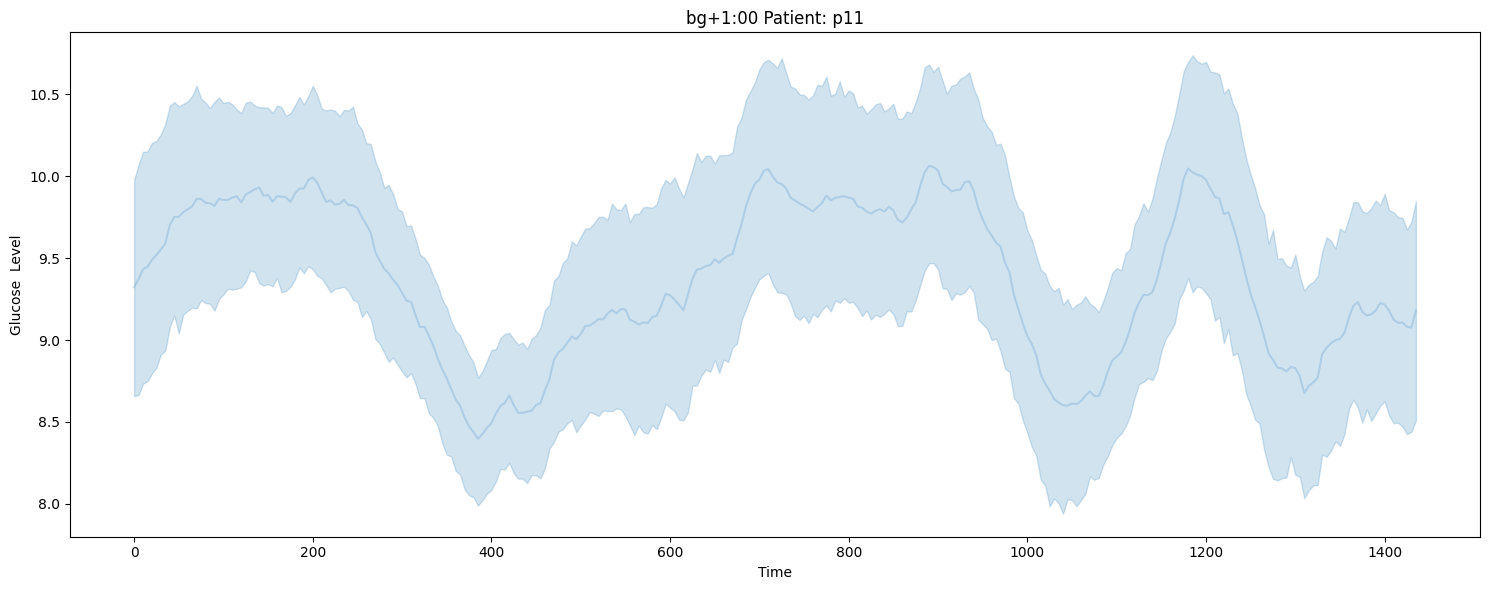

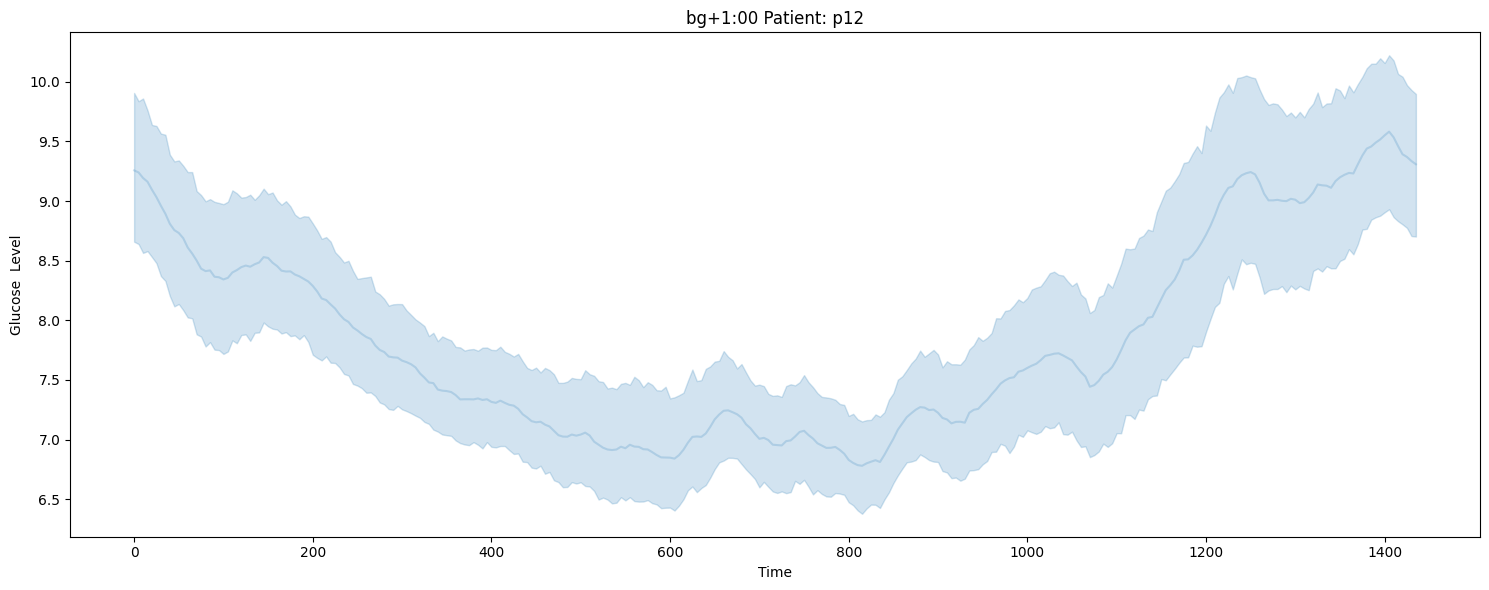

In [18]:
# Evolution of the target variable over time
for p_num in train['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = train[train['p_num'] == p_num]
    sns.lineplot(x = 'time_min', y = target, data = df, alpha = 0.2)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()

#### Visualisation of feature 'carbs'

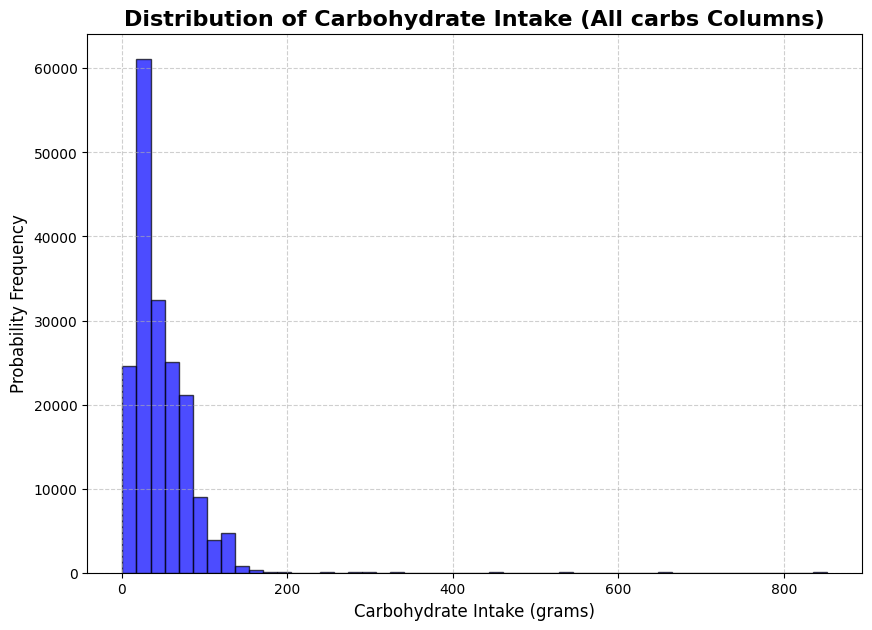

In [19]:
carbs_cols = [col for col in train.columns if 'carbs' in col]
all_carbs_data = pd.concat([train[col] for col in carbs_cols])

plt.figure(figsize = (10,7))
all_carbs_data.plot(kind = 'hist', bins = 50, color = 'blue', edgecolor = "black", alpha = 0.7)
plt.title('Distribution of Carbohydrate Intake (All carbs Columns)', fontsize=16, fontweight='bold')
plt.xlabel('Carbohydrate Intake (grams)', fontsize=12)
plt.ylabel('Probability Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha =0.6)
plt.show()

#Carbs represents the total carbohydrates consumed In grammes in the last 5 minutes, we can see that there are many NaNs in the carbs feature in the data.

##### Visualisation of heart rating

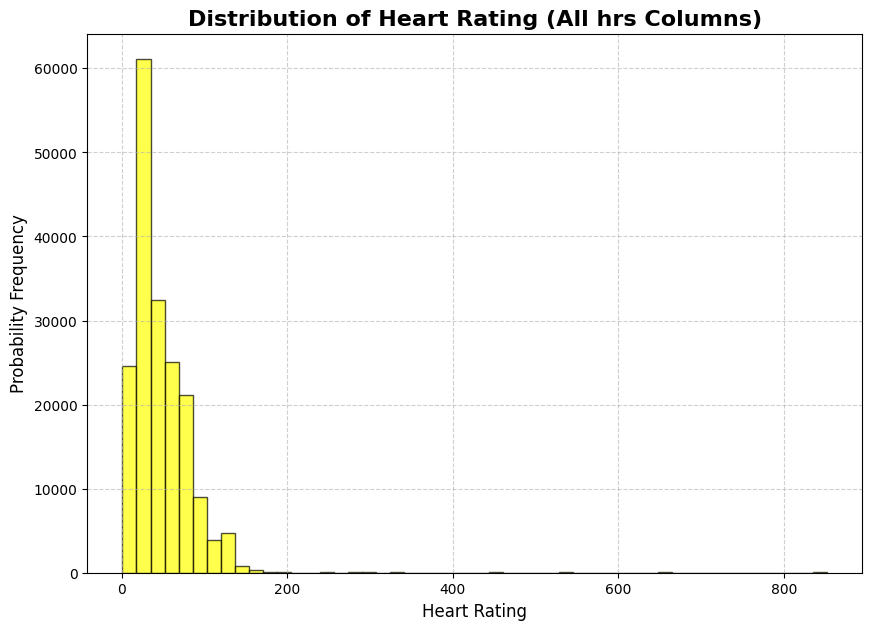

In [21]:
hr_cols = [col for col in train.columns if 'hr' in col]
all_hr_data = pd.concat([train[col] for col in hr_cols])

plt.figure(figsize = (10,7))
all_carbs_data.plot(kind = 'hist', bins = 50, color = 'yellow', edgecolor = "black", alpha = 0.7)
plt.title('Distribution of Heart Rating (All hrs Columns)', fontsize=16, fontweight='bold')
plt.xlabel('Heart Rating', fontsize=12)
plt.ylabel('Probability Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha =0.6)
plt.show()

In [16]:
def fill_na_with_linear_interpolation(df, prefixe):
    # Filter out all columns containing ‘bg’
    cols = [col for col in df.columns if col.startswith(prefixe)]
    
    # Linearly interpolate each row   
    df[cols] = df[cols].interpolate(method='linear', axis=1, limit_direction='both')
    
    return df



#### Blood Glucose

In [17]:
train = fill_na_with_linear_interpolation(train, 'bg')
test = fill_na_with_linear_interpolation(test, 'bg')

In [18]:
def actual_time(df, col_var):
    df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')
    df['time_diff'] = df['hours'].astype(int) * 60 - df['minutes'].astype(int)
    
    # Calculate actual time in minutes for each bg measurement
    df['actual_time'] = df['time_min'] + df['time_diff']
    
    df = df.drop(columns=['hours', 'minutes', 'time_diff'])
    
    return df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_56298/986835876.py:2: SyntaxWarning: invalid escape sequence '\d'
  df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')


In [8]:
bg_columns = [col for col in train.columns if col.startswith('bg-')]
bg_df = pd.melt(train, id_vars=['id', 'time_min'], value_vars=bg_columns, var_name='bg_time', value_name='bg_value')
bg_df = actual_time(bg_df, 'bg_time')
bg_df.head(10)

,id,time_min,bg_time,bg_value,actual_time
0,p01_0,370,bg-5:55,9.6,15
1,p01_1,385,bg-5:55,9.7,30
2,p01_2,400,bg-5:55,9.2,45
3,p01_3,415,bg-5:55,8.7,60
4,p01_4,430,bg-5:55,8.4,75
5,p01_5,445,bg-5:55,8.1,90
6,p01_6,460,bg-5:55,8.3,105
7,p01_7,475,bg-5:55,9.6,120
8,p01_8,490,bg-5:55,11.1,135
9,p01_9,505,bg-5:55,11.8,150



Number of remaining NaN values: 0


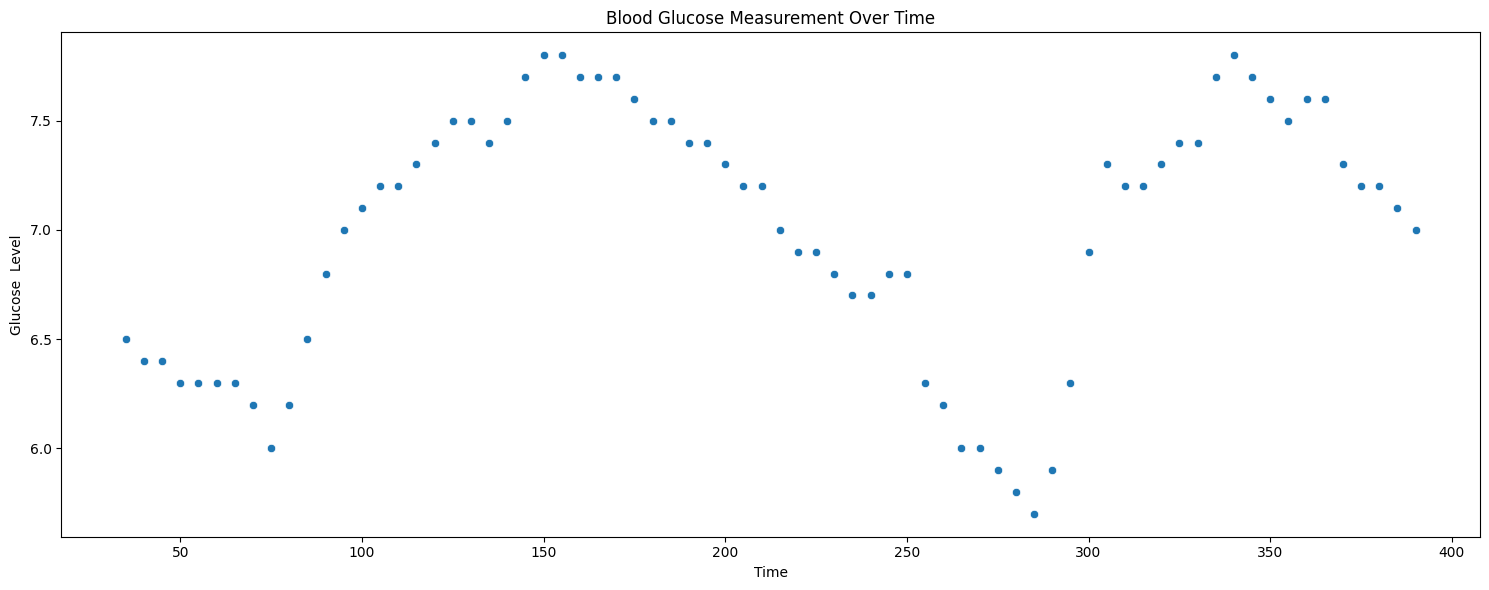

In [9]:
nan_count = bg_df['bg_value'].isna().sum()
print(f"\nNumber of remaining NaN values: {nan_count}")

plt.figure(figsize=(15, 6))
sns.scatterplot(x='actual_time', y='bg_value', data=bg_df[bg_df["id"] == "p03_5"])   
plt.title('Blood Glucose Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose  Level')
plt.tight_layout() 
plt.show()




#### Encoding activity

In [19]:
from sklearn.preprocessing import LabelEncoder

activity_train_cols = [col for col in train.columns if 'activity' in col]
activity_test_cols = [col for col in test.columns if 'activity' in col]
#初始化 LabelEncoder
label_encoder = LabelEncoder()

#emncode activity columns
for col in activity_train_cols:
    train[col] = label_encoder.fit_transform(train[col].fillna('Unknown'))
for col in activity_test_cols:
    test[col] = label_encoder.fit_transform(test[col].fillna('Unknown'))









In [20]:
df_train = train.drop(columns=['time',  'p_num'])

In [21]:
df_train.head()

,id,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,time_min,sin_time,cos_time
0,p01_0,9.6,9.6,9.6,9.633333,9.666667,9.7,9.533333,9.366667,9.2,...,16,16,16,16,16,13.4,6,370,0.999048,-0.043619
1,p01_1,9.7,9.7,9.7,9.533333,9.366667,9.2,9.033333,8.866667,8.7,...,16,16,16,16,16,12.8,6,385,0.994056,-0.108867
2,p01_2,9.2,9.2,9.2,9.033333,8.866667,8.7,8.600000,8.500000,8.4,...,16,16,16,16,16,15.5,6,400,0.984808,-0.173648
3,p01_3,8.7,8.7,8.7,8.600000,8.500000,8.4,8.300000,8.200000,8.1,...,16,16,16,16,16,14.8,6,415,0.971342,-0.237686
4,p01_4,8.4,8.4,8.4,8.300000,8.200000,8.1,8.166667,8.233333,8.3,...,16,16,16,16,16,12.7,7,430,0.953717,-0.300706


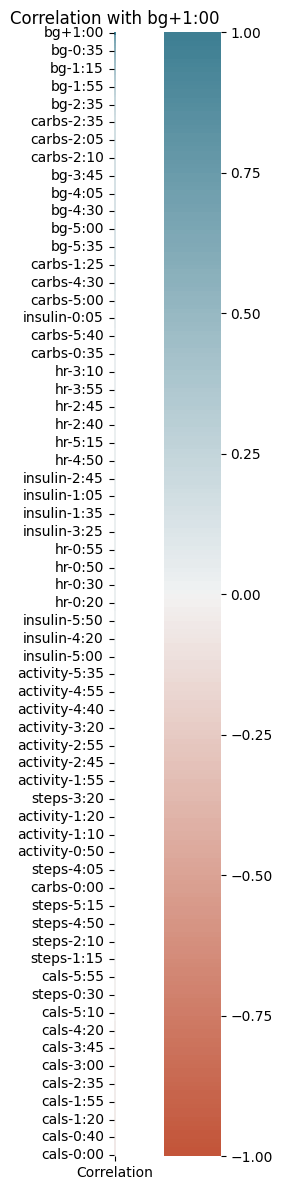

In [22]:
train_corr = df_train.drop(columns=['hour', 'time_min', 'sin_time', 'cos_time', 'id'], axis=1)

correlations_with_bg = train_corr.corrwith(train_corr['bg+1:00'])
correlations_with_bg = correlations_with_bg.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlations_with_bg, columns=['Correlation'])

# Create the heatmap
plt.figure(figsize=(10, 12))
axis_corr = sns.heatmap(
    correlation_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt='.2f'
)

plt.title("Correlation with bg+1:00")
plt.tight_layout()
plt.show()

#### Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
bg_cols = [col for col in df_train.columns if 'bg' in col]
insulin_cols = [col for col in df_train.columns if 'insulin' in col]
carbs_cols = [col for col in df_train.columns if 'carbs' in col]
hr_cols = [col for col in df_train.columns if 'hr' in col]
steps_cols = [col for col in df_train.columns if 'steps' in col]
activity_cols = [col for col in df_train.columns if 'activity' in col]

# Select the columns to be normalised
columns_to_normalize = bg_cols + insulin_cols + carbs_cols + hr_cols + activity_cols + steps_cols

# MinMaxScaler
scaler = MinMaxScaler()

# Normaliser selected columns
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

# Check the normalised columns
print(df_train[columns_to_normalize].head())

    bg-5:55   bg-5:50   bg-5:45   bg-5:40   bg-5:35   bg-5:30   bg-5:25  \
0  0.289062  0.289062  0.289062  0.290365  0.291667  0.292969  0.286458   
1  0.292969  0.292969  0.292969  0.286458  0.279948  0.273438  0.266927   
2  0.273438  0.273438  0.273438  0.266927  0.260417  0.253906  0.250000   
3  0.253906  0.253906  0.253906  0.250000  0.246094  0.242188  0.238281   
4  0.242188  0.242188  0.242188  0.238281  0.234375  0.230469  0.233073   

    bg-5:20   bg-5:15   bg-5:10  ...  steps-0:45  steps-0:40  steps-0:35  \
0  0.279948  0.273438  0.266927  ...         NaN         NaN         NaN   
1  0.260417  0.253906  0.250000  ...         NaN         NaN         NaN   
2  0.246094  0.242188  0.238281  ...         NaN         NaN         NaN   
3  0.234375  0.230469  0.233073  ...         NaN         NaN         NaN   
4  0.235677  0.238281  0.255208  ...         NaN         NaN         NaN   

   steps-0:30  steps-0:25  steps-0:20  steps-0:15  steps-0:10  steps-0:05  \
0         NaN  

In [24]:
df_train

,id,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,time_min,sin_time,cos_time
0,p01_0,0.289062,0.289062,0.289062,0.290365,0.291667,0.292969,0.286458,0.279948,0.273438,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.437500,6,370,0.999048,-0.043619
1,p01_1,0.292969,0.292969,0.292969,0.286458,0.279948,0.273438,0.266927,0.260417,0.253906,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.414062,6,385,0.994056,-0.108867
2,p01_2,0.273438,0.273438,0.273438,0.266927,0.260417,0.253906,0.250000,0.246094,0.242188,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.519531,6,400,0.984808,-0.173648
3,p01_3,0.253906,0.253906,0.253906,0.250000,0.246094,0.242188,0.238281,0.234375,0.230469,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.492188,6,415,0.971342,-0.237686
4,p01_4,0.242188,0.242188,0.242188,0.238281,0.234375,0.230469,0.233073,0.235677,0.238281,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.410156,7,430,0.953717,-0.300706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,0.257812,0.269531,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.347656,23,1415,-0.108867,0.994056
177020,p12_25295,0.269531,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.339844,23,1420,-0.087156,0.996195
177021,p12_25296,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,0.296875,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.332031,23,1425,-0.065403,0.997859
177022,p12_25297,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,0.296875,0.285156,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.324219,23,1430,-0.043619,0.999048


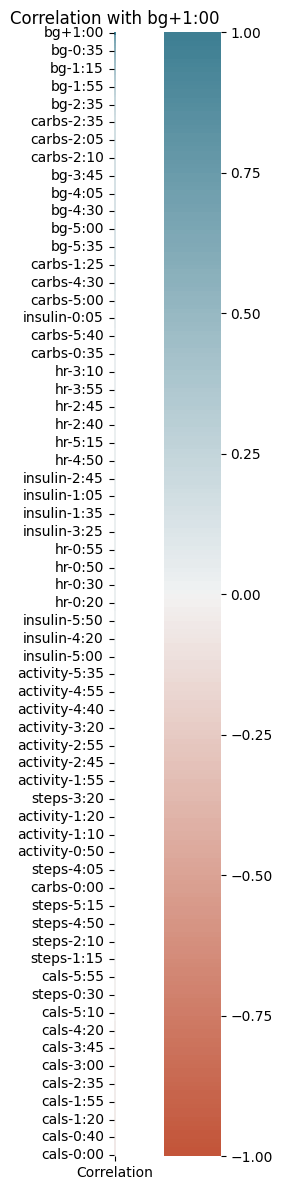

In [25]:
train_corr = df_train.drop(columns=['hour', 'time_min', 'sin_time', 'cos_time', 'id'], axis=1)
correlations_with_bg = train_corr.corrwith(df_train['bg+1:00'])
correlations_with_bg = correlations_with_bg.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlations_with_bg, columns=['Correlation'])

# Create the heatmap
plt.figure(figsize=(10, 12))
axis_corr = sns.heatmap(
    correlation_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt='.2f'
)

plt.title("Correlation with bg+1:00")
plt.tight_layout()
plt.show()

In [26]:
df_train

,id,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,time_min,sin_time,cos_time
0,p01_0,0.289062,0.289062,0.289062,0.290365,0.291667,0.292969,0.286458,0.279948,0.273438,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.437500,6,370,0.999048,-0.043619
1,p01_1,0.292969,0.292969,0.292969,0.286458,0.279948,0.273438,0.266927,0.260417,0.253906,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.414062,6,385,0.994056,-0.108867
2,p01_2,0.273438,0.273438,0.273438,0.266927,0.260417,0.253906,0.250000,0.246094,0.242188,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.519531,6,400,0.984808,-0.173648
3,p01_3,0.253906,0.253906,0.253906,0.250000,0.246094,0.242188,0.238281,0.234375,0.230469,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.492188,6,415,0.971342,-0.237686
4,p01_4,0.242188,0.242188,0.242188,0.238281,0.234375,0.230469,0.233073,0.235677,0.238281,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.410156,7,430,0.953717,-0.300706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,p12_25294,0.257812,0.269531,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.347656,23,1415,-0.108867,0.994056
177020,p12_25295,0.269531,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.339844,23,1420,-0.087156,0.996195
177021,p12_25296,0.273438,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,0.296875,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.332031,23,1425,-0.065403,0.997859
177022,p12_25297,0.281250,0.296875,0.312500,0.320312,0.316406,0.308594,0.304688,0.296875,0.285156,...,0.727273,0.727273,0.727273,0.727273,0.727273,0.324219,23,1430,-0.043619,0.999048


In [27]:
import numpy as np

features = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']  # features
n_time_steps = 72

windowed_data = []

# Iterate over each row sample
for _, row in df_train.iterrows():
    # initialize an empty list to store the sample data
    sample = []
    
    # extract the sin_time and cos_time
    sin_time = row['sin_time']
    cos_time = row['cos_time']
    
    # for each feature, extract the data for the 72 time steps
    for feature in features:
        feature_data = []
        for i in range(n_time_steps):
            # calculate the hours and minutes
            hours, minutes = divmod(i * 5, 60)  
            col_name = f'{feature}-{hours}:{minutes:02d}'  # e.g., 'bg-1:30'
            
            # append the value of the current feature and time step
            if col_name in row:
                feature_data.append(row[col_name])
            else:
                feature_data.append(np.nan)  # In case of missing columns, fill with NaN
                
        sample.append(feature_data)  # Append this feature's data (72 values) to sample
    
    # Transpose sample to (72, number of features)
    sample = np.array(sample).T
    
    # Add sin_time and cos_time column to the sample
    sin_time_column = np.full((n_time_steps, 1), sin_time)
    cos_time_column = np.full((n_time_steps, 1), cos_time)
    sample = np.concatenate([sample, sin_time_column, cos_time_column], axis=1)
    
    # Add this sample to windowed_data
    windowed_data.append(sample)

# Convert list to 3D NumPy array: (number of samples, number of time steps, number of features)
windowed_data = np.array(windowed_data)

# Check the shape of the windowed data
print(windowed_data.shape)  # Should be (number of samples, 72, number of features + 2 for time)


(177024, 72, 9)


In [38]:
import numpy as np

def create_target_window(data, window_size):
    y = []
    for i in range(len(data)):
        y.append(data[i ])  # target value is the next value
    return np.array(y)

train_target = df_train['bg+1:00'].values

# Create target windows
y_train = create_target_window(train_target, 72)

# output shape
print(f"y_train shape: {y_train.shape}")


y_train shape: (177024,)


In [39]:
print(f"Shape of X_train: {windowed_data.shape}")  # (number of samples, 72, 7)
print(f"Shape of y_train: {y_train.shape}")  # (number of samples, 9)

Shape of X_train: (177024, 72, 9)
Shape of y_train: (177024,)


In [43]:
df_train.iloc[0]

id             p01_0
bg-5:55     0.289062
bg-5:50     0.289062
bg-5:45     0.289062
bg-5:40     0.290365
              ...   
bg+1:00       0.4375
hour               6
time_min         370
sin_time    0.999048
cos_time   -0.043619
Name: 0, Length: 510, dtype: object

In [42]:
y_train

array([0.4375    , 0.4140625 , 0.51953125, ..., 0.33203125, 0.32421875,
       0.3125    ])

In [30]:
X_train = windowed_data
X_train[0][1]

array([ 0.51822917,  0.00749698,         nan,         nan,         nan,
               nan,  0.72727273,  0.99904822, -0.04361939])

#### masker

In [52]:

mask = np.where(np.isnan(X_train), 0, 1)

# fill NaN values with 0
X_train = np.nan_to_num(X_train, nan=0.0)

# Check the shape of the mask and filled data
print(f"Mask shape: {mask.shape}")  # (177024, 72, 8)
print(f"Windowed data shape: {X_train.shape}")  # (177024, 72, 8)


Mask shape: (177024, 72, 9)
Windowed data shape: (177024, 72, 9)


#### MODEL GRU

In [58]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import GRU, Dense, Masking
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Masking, Dropout, BatchNormalization




In [59]:
# Create a GRU model
model = Sequential()

# Add Masking layer to ignore the padded values
model.add(Masking(mask_value=0, input_shape=(72, 9)))  # 72 时间步，9 个特征

# Add a GRU layer with 64 units and tanh activation
model.add(GRU(units=64, return_sequences=False, activation='tanh'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add a Dropout layer
model.add(Dropout(0.2))

# Add a Dense output layer with linear activation
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Add a Dense output layer with linear activation
model.add(Dense(1))  # output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

/home/haiding/.local/lib/python3.12/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)             │ (None, 72, 9)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 128 (512.00 B)

In [50]:
# Visualize the model
plot_model(model, to_file='gru_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [60]:
# Verify NaN values
print(np.isnan(X_train).sum())  
print(np.isnan(y_train).sum())  



0
0


In [61]:
# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 94s 41ms/step - loss: 0.0845 - mae: 0.1880 - val_loss: 0.0129 - val_mae: 0.0873
Epoch 2/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - loss: 0.0136 - mae: 0.0905 - val_loss: 0.0062 - val_mae: 0.0613
Epoch 3/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 104s 47ms/step - loss: 0.0084 - mae: 0.0695 - val_loss: 0.0066 - val_mae: 0.0598
Epoch 4/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 97s 44ms/step - loss: 0.0076 - mae: 0.0659 - val_loss: 0.0059 - val_mae: 0.0583
Epoch 5/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 93s 42ms/step - loss: 0.0072 - mae: 0.0638 - val_loss: 0.0182 - val_mae: 0.1164
Epoch 6/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 92s 41ms/step - loss: 0.0069 - mae: 0.0626 - val_loss: 0.0081 - val_mae: 0.0663
Epoch 7/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - loss: 0.0068 - mae: 0.0620 - val_loss: 0.0062 - val_mae: 0.0578
Epoch 8/10
2213/2213 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - loss: 0.0068 - mae: 0.0618 - val_loss: 0.0057 - val_mae: 0.0568
Epoch 9/10
2213/2213 ━━

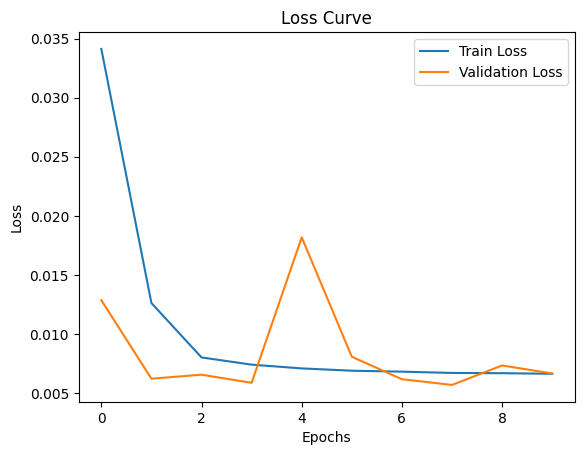

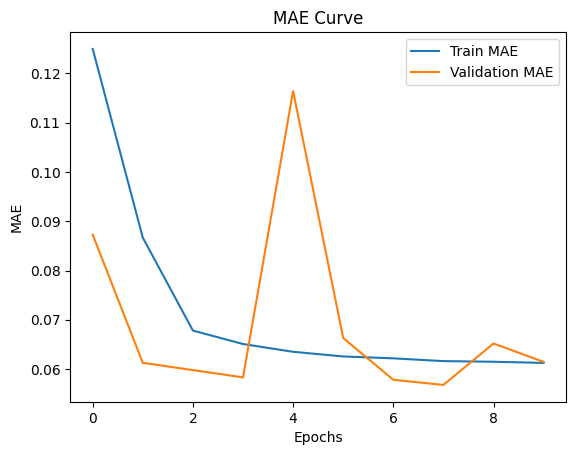

In [62]:

# Plot the loss curves for training and validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# plot the MAE curves for training and validation
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()
plt.show()
